# - CASE STUDY : Bank Customer Churm Prediction 
- 참고 코드 : https://www.kaggle.com/code/yldzburhan/ps4e01-bank-churn-prediction-lgbm-xgb

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
train_df = pd.read_csv('C:/Users/jeonghwanlee/Downloads/train.csv')
test_df = pd.read_csv('C:/Users/jeonghwanlee/Downloads/test.csv')
origin_df = pd.read_csv('C:/Users/jeonghwanlee/Downloads/Churn_Modelling.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [6]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [7]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [8]:
origin_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [9]:
# 컬럼의 고유값
train_df = pd.concat([train_df.drop(['id','Surname'], axis=1), origin_df.drop(['RowNumber', 'Surname'], axis=1)], ignore_index=True)
test_df.drop(['id','Surname'], axis=1, inplace=True)

In [10]:
train_df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


### 👀 Features:

- id: Unique identifier for each record. 인덱스 
- CustomerId: Unique customer identifier. 고객 id
- Surname: Customer's last name. 고객의 성
- CreditScore: Customer's credit score. 신용 점수
- Geography: Geographical region where the customer resides. 거주 지역
- Gender: Customer's gender. 성별
- Age: Customer's age. 나이
- Tenure: Number of years the customer has been associated with the bank. 가입년수
- Balance: Customer's account balance. 계좌 잔액
- NumOfProducts: Number of products the customer has. 가입 상품 수
- HasCrCard: Whether the customer has a credit card (1: Yes, 0: No). 신용카드 여부
- IsActiveMember: Whether the customer is an active member (1: Yes, 0: No). 활성화된 회원 여부
- EstimatedSalary: Estimated salary of the customer. 예상 급여
- Exited: Target variable indicating whether the customer has exited (1: Yes, 0: No). 이탈여부

- ## 데이터 전처리

In [11]:
train_df.isnull().sum()

CustomerId         0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

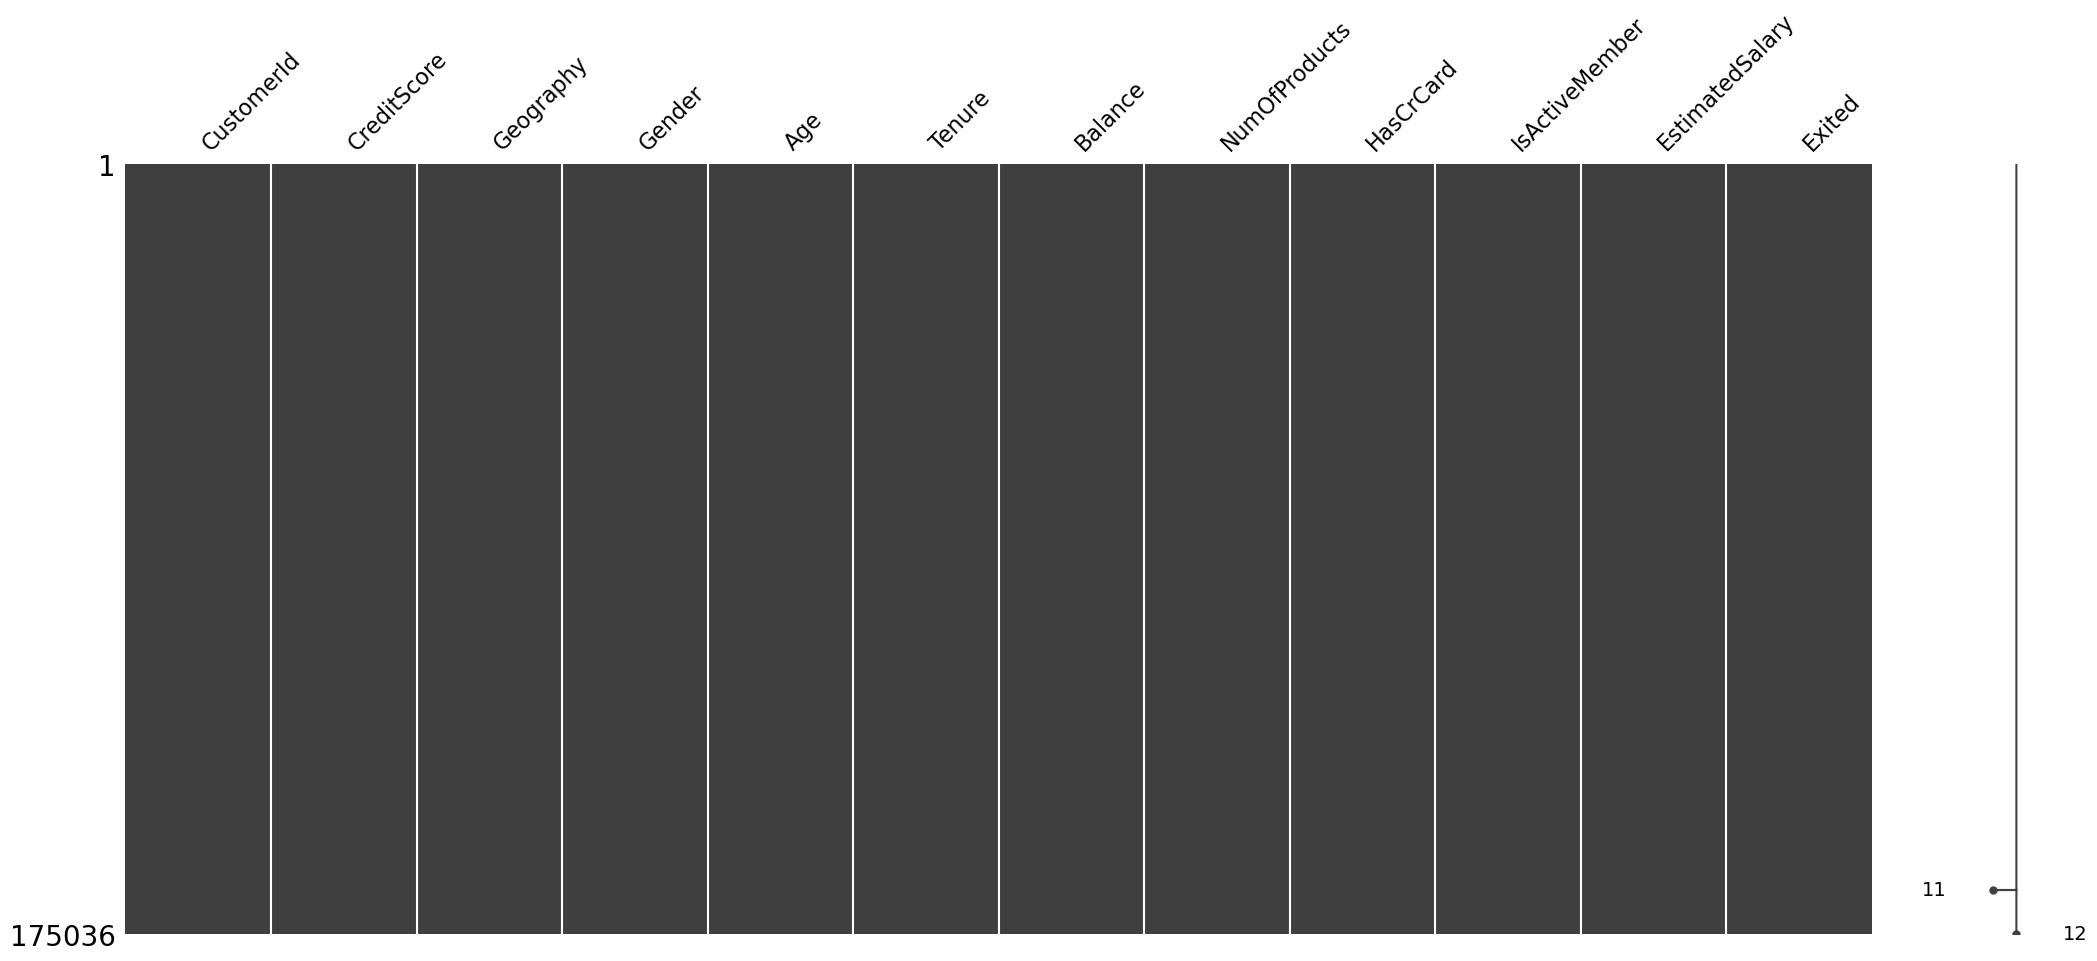

In [12]:
import missingno as msno
msno.matrix(train_df)

In [13]:
train_df.duplicated().sum()

199

In [14]:
# 중복행 삭제
train_df.drop_duplicates(inplace = True)

In [15]:
train_df.nunique()

CustomerId         23421
CreditScore          460
Geography              3
Gender                 2
Age                   73
Tenure                11
Balance            30239
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55581
Exited                 2
dtype: int64

## 타켓 컬럼 비율 확인

In [16]:
# 시각화 위한 일시적 처리
train_df["Exited"]=train_df["Exited"].map({0: "No",1: "Yes"})

In [17]:
def plot_target(df: pd.DataFrame, col: str, title: str, pie_colors:list) -> None:
    fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,1])

    textprops={'fontsize': 12, 'weight': 'bold',"color": "black"}
    ax[0].pie(df[col].value_counts().to_list(),
            colors=pie_colors,
            labels=df[col].value_counts().index.to_list(),
            autopct='%1.f%%', 
            explode=([.05]*df[col].nunique()),
            pctdistance=0.5,
            wedgeprops={'linewidth' : 1, 'edgecolor' : 'black'}, 
            textprops=textprops)

    sns.countplot(x = col, data=df, palette = "pastel6", order=df[col].value_counts().to_dict().keys())
    for p, count in enumerate(df[col].value_counts()):
        ax[1].text(p-0.11, count+np.sqrt(count)+1000, count, color='black', fontsize=13)
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    plt.yticks([])
    plt.box(False)
    fig.suptitle(x=0.56, t=f'► {title} Distribution ◄', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

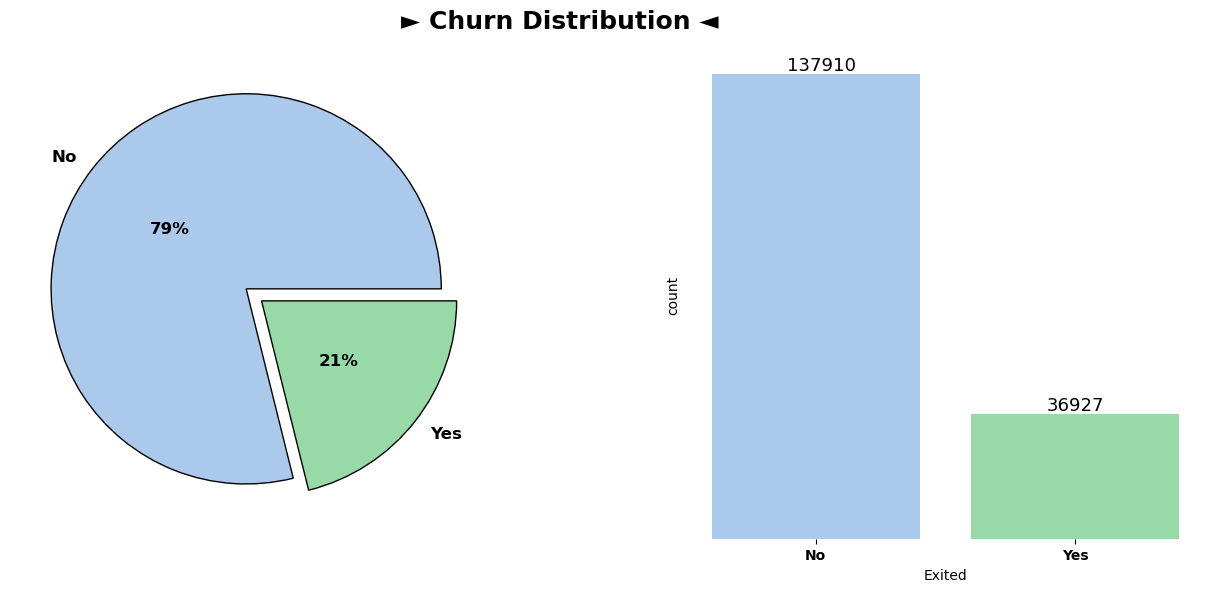

In [18]:
plot_target(train_df, 
            col="Exited", 
            title="Churn", 
            pie_colors=["#abc9ea","#98daa7","#f3aba8","#d3c3f7","#f3f3af","#c0ebe9"])

In [19]:
train_df['Exited'].value_counts()

Exited
No     137910
Yes     36927
Name: count, dtype: int64

###  -> 타겟이 되는 Exited의 값이 8:2로 불균형하여 후에 불균형을 해소할 샘플링 작업 등이 필요할 것으로 보임

In [46]:
# 숫자형 데이터  
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [47]:
# 범주형 데이터
target = "Exited"
cat_cols = ['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']

## 각각의 컬럼 내 값 비율 단순 분석

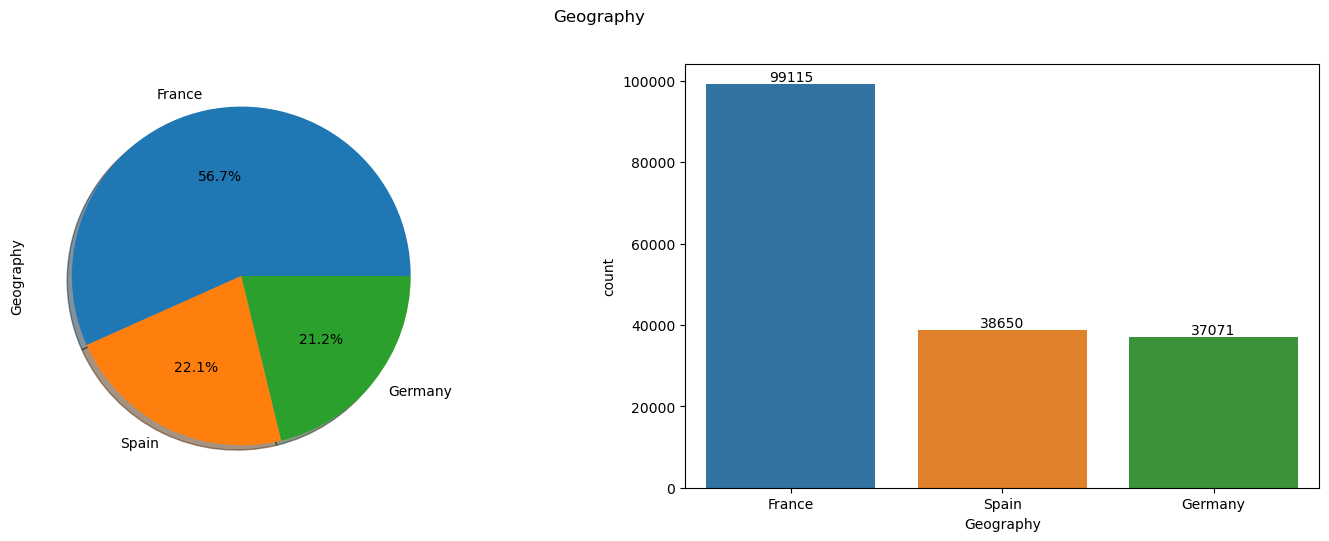

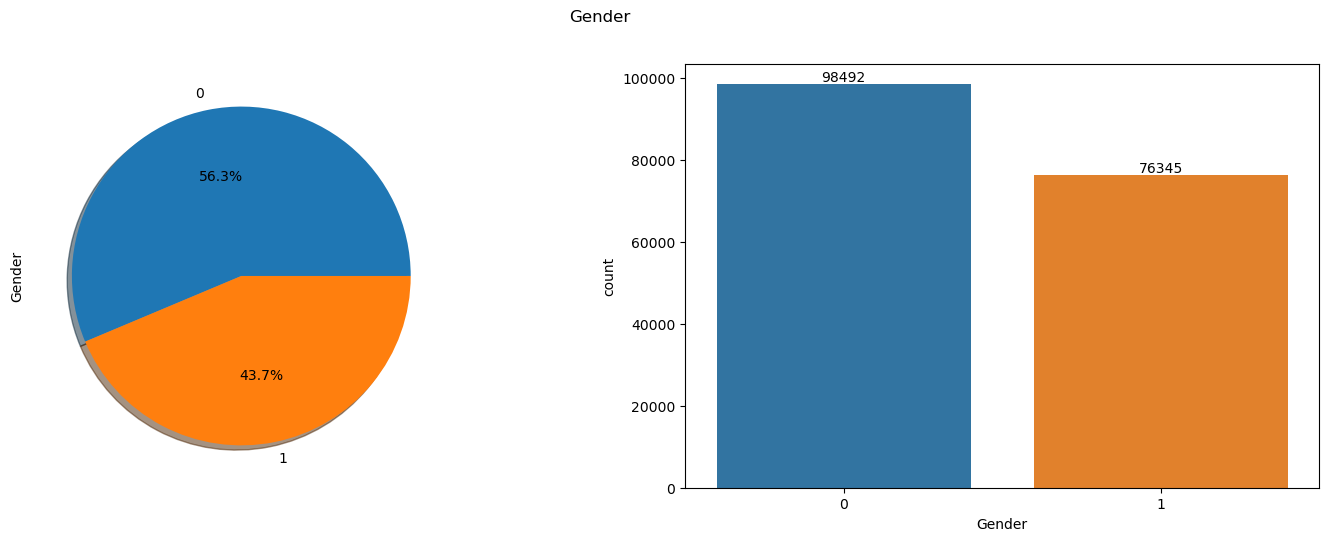

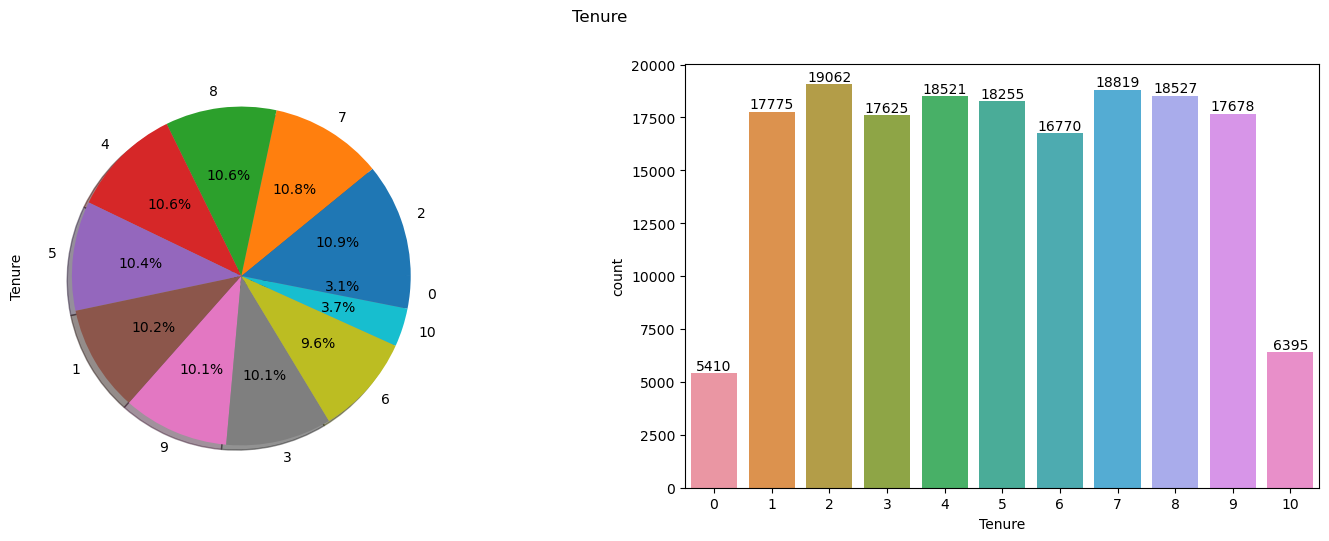

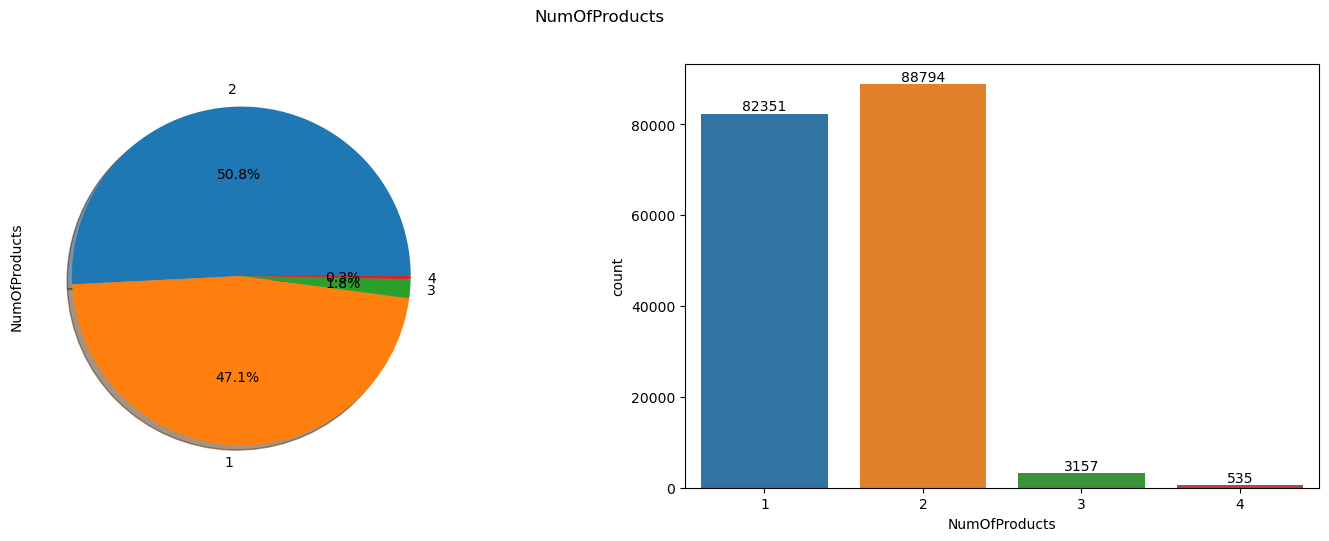

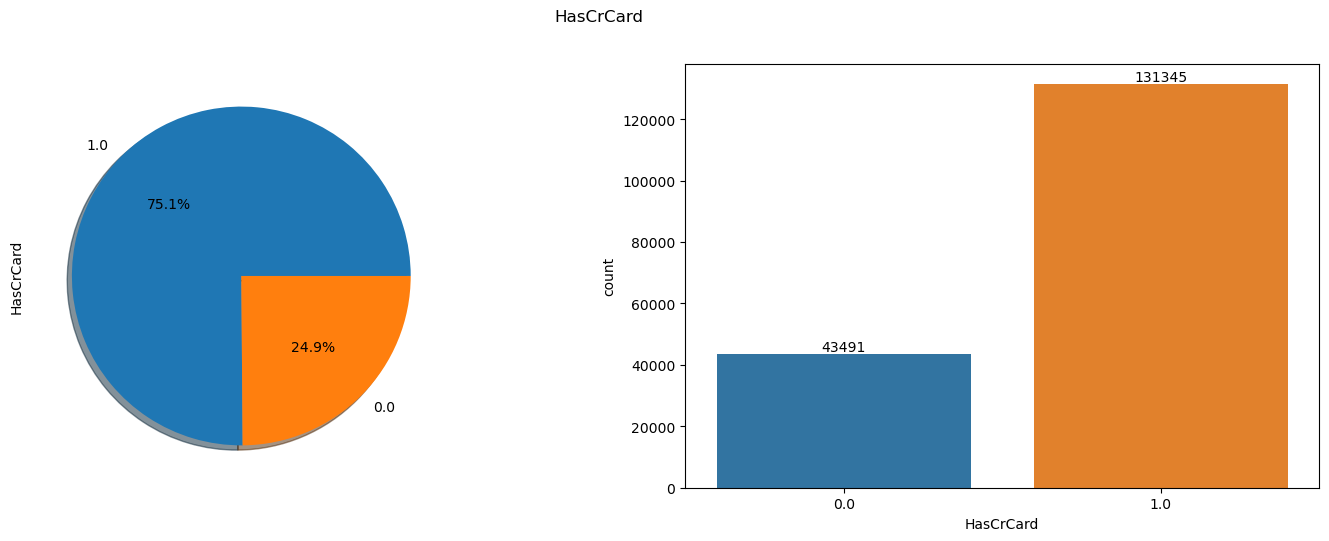

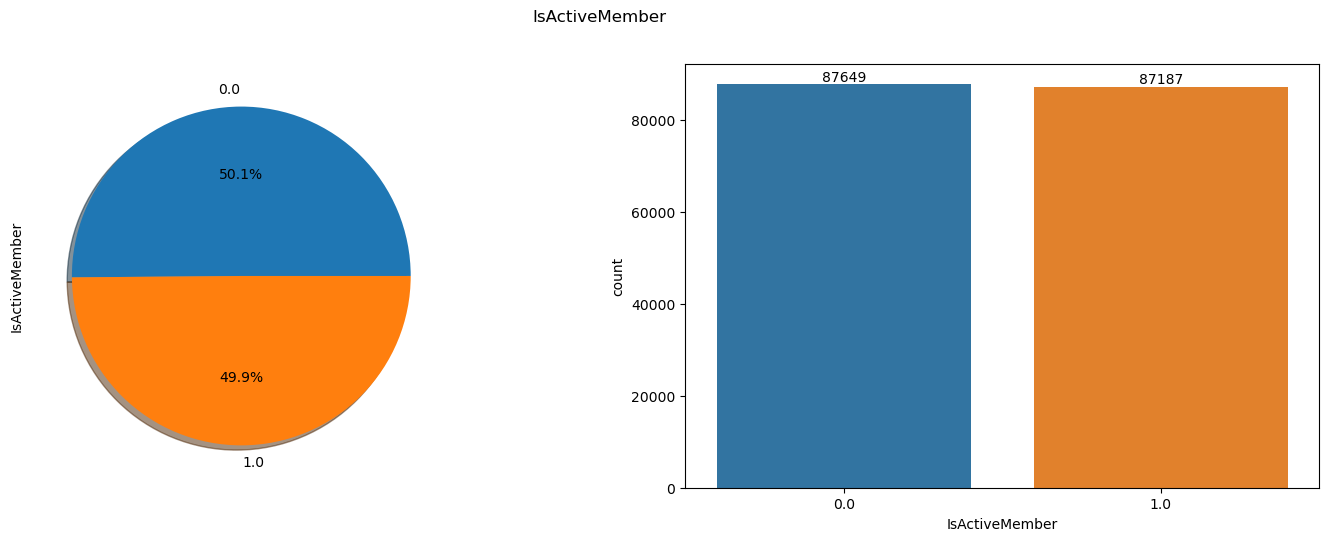

In [36]:
for column in cat_cols:
    f,ax=plt.subplots(1,2,figsize=(18,5.5))
    train_df[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column,data=train_df,ax=ax[1])
    ax[1].bar_label(ax[1].containers[0])
    plt.suptitle(f'{column}')
    plt.show()

- 성비는 5.5 : 4.5 수준으로 남자의 비율이 조금 더 많다는 것을 알 수 있다.
- 시는 지역은 약 56%가 프랑스, 나머지 남은 비율의 절반씩 약 22%의 스페인, 독일로 이루어져 있다.
- 가입 기간(년수) : 1년 미만과 10년 이상을 제외한 나머지는 비교적 동일한 비율을 가진다.
- 가입 상품 수 : 98% 이상이 1개와 2개를 가지고 있고 3개와 4개를 가진 비율은 희박하다.
- 신용카드 여부 : 75%가 가지고 있고 25%는 가지고 있지 않다.
- 활성회원 여부 : 활성회원과 비활성회원이 거의 50%씩 구성되어 있다. 

## 범주형 데이터 이탈별 분석

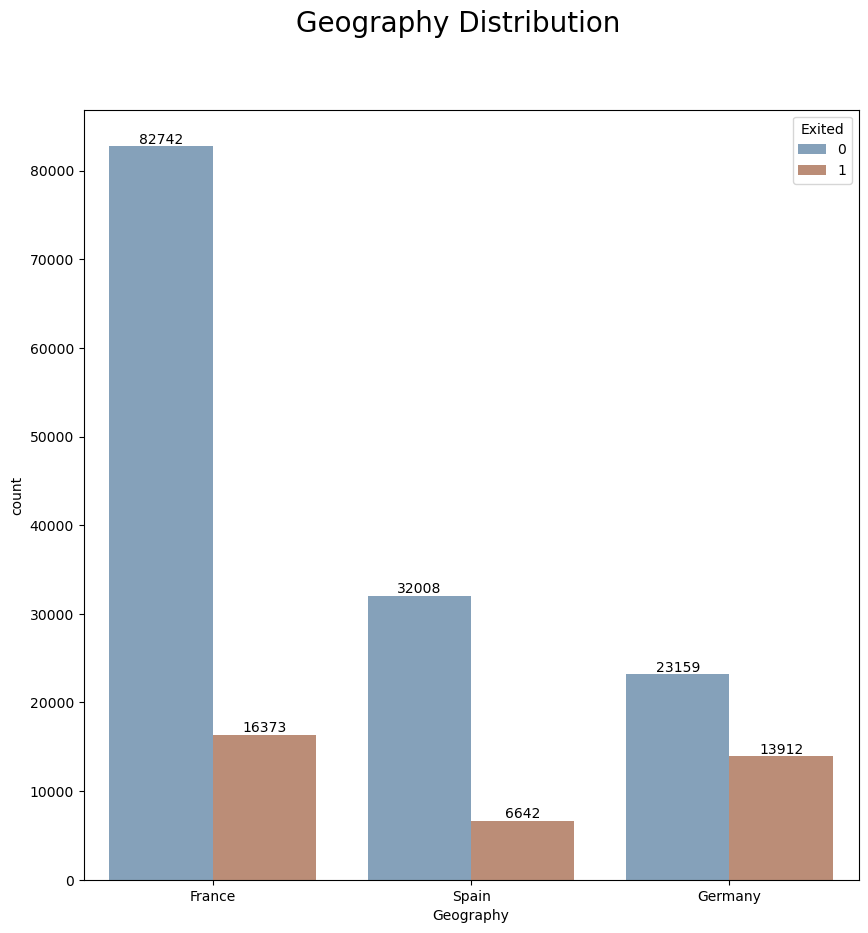

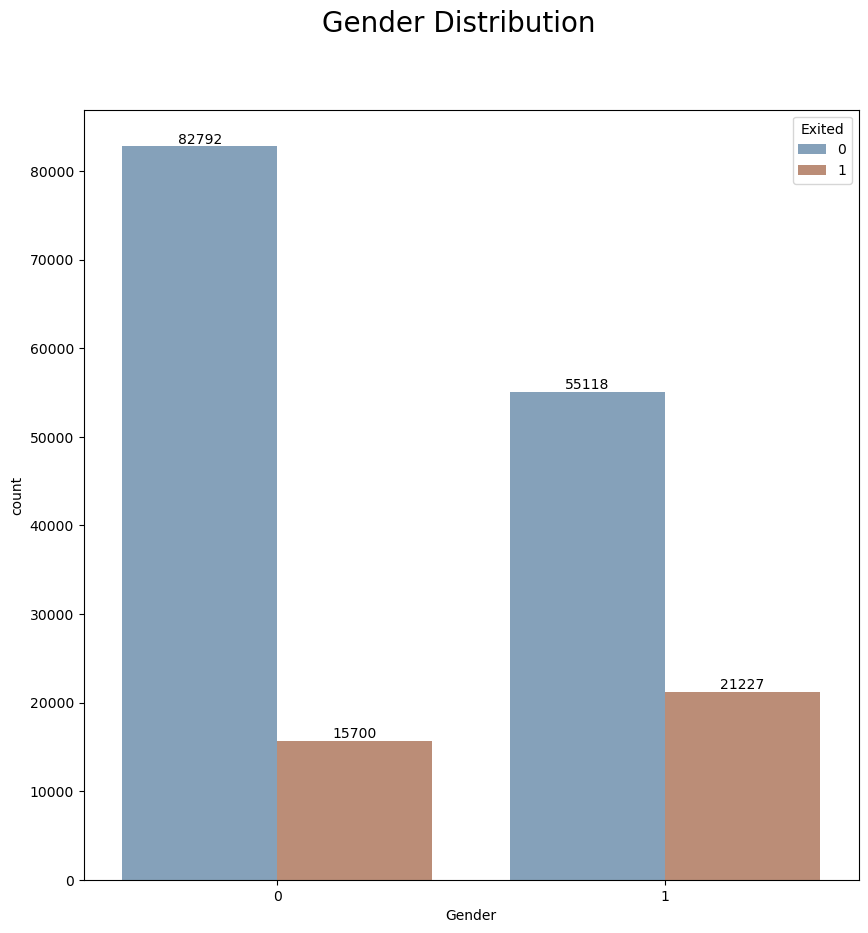

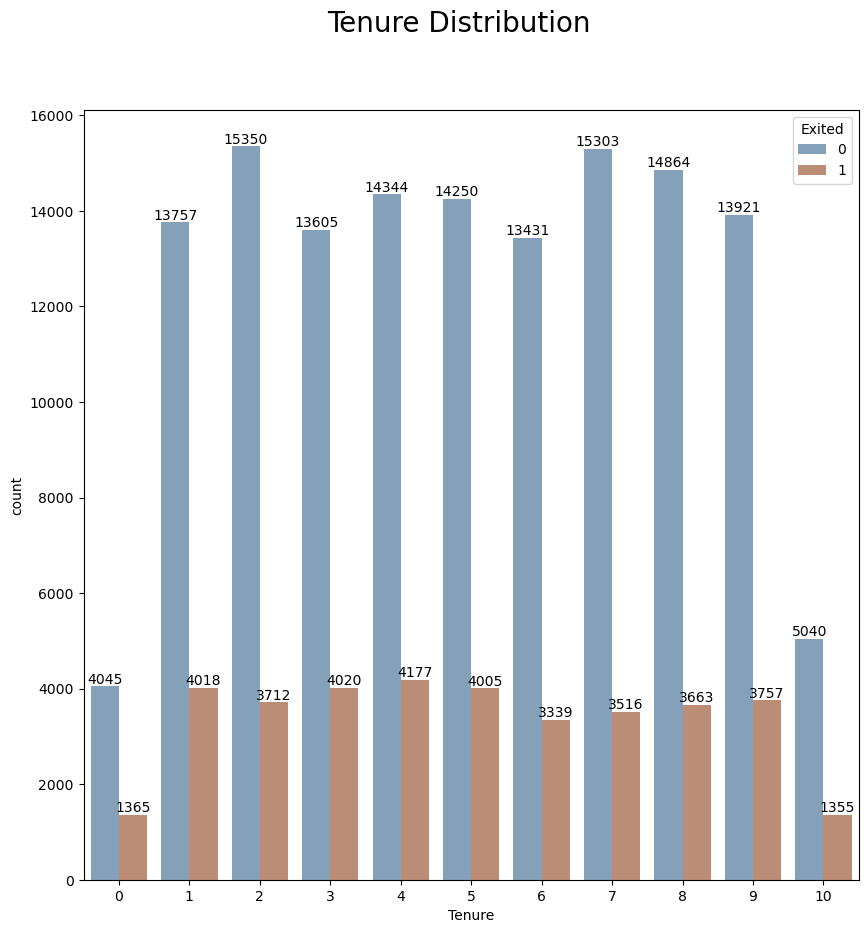

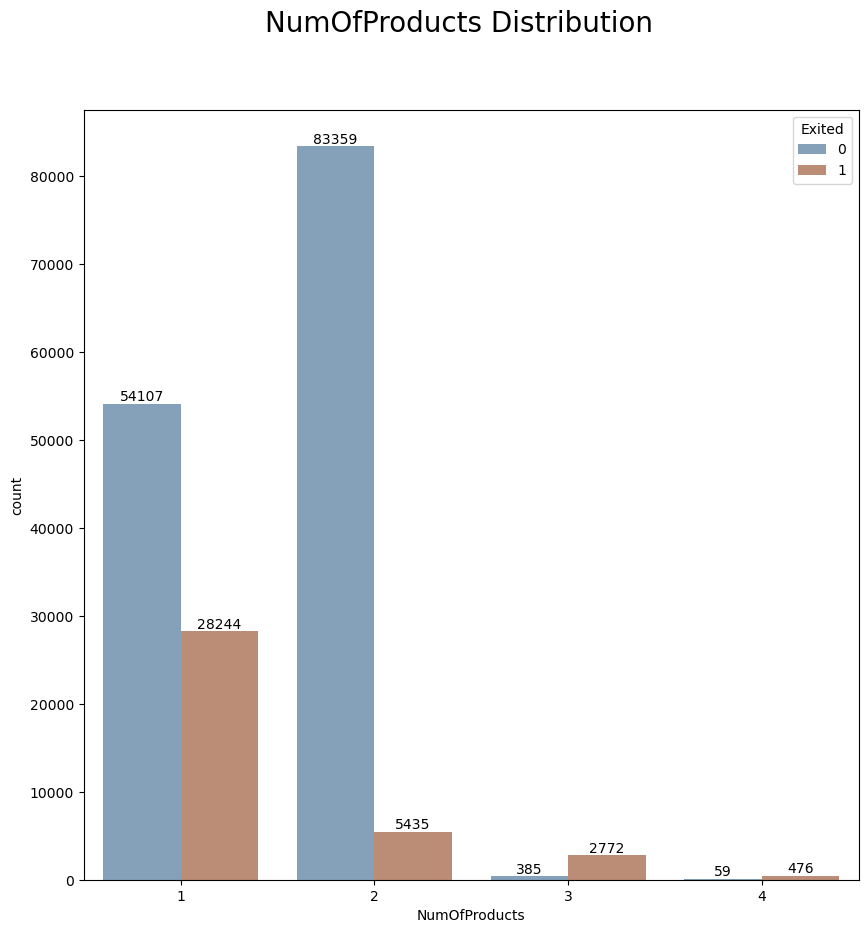

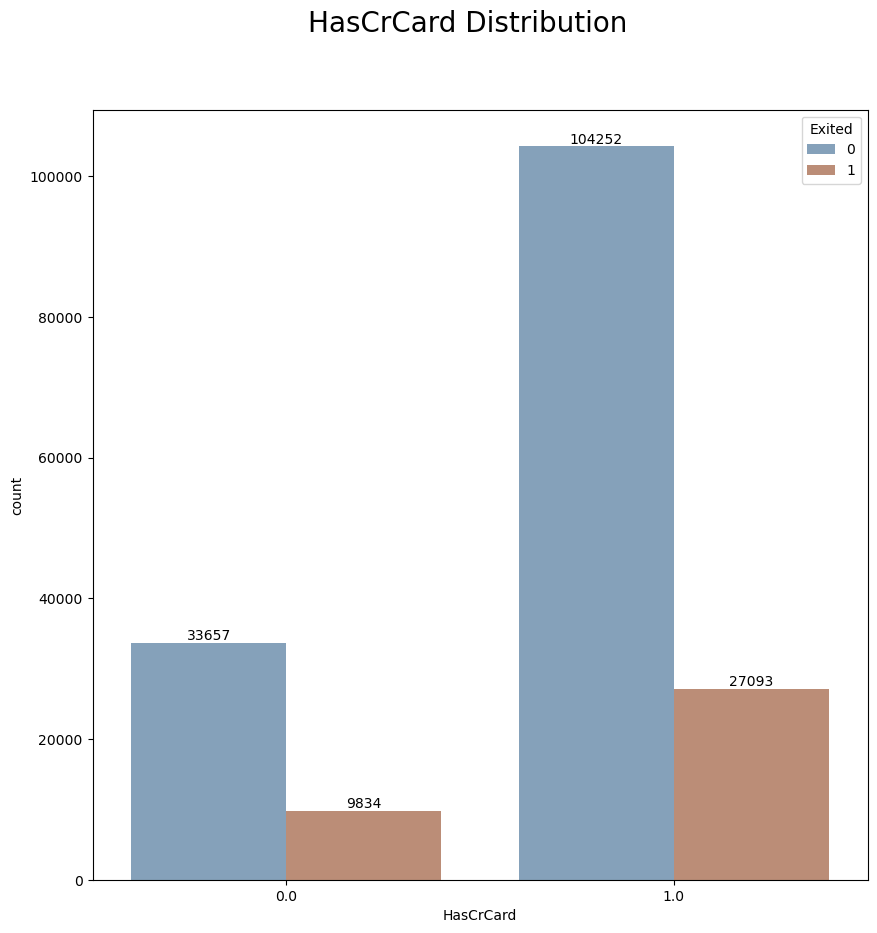

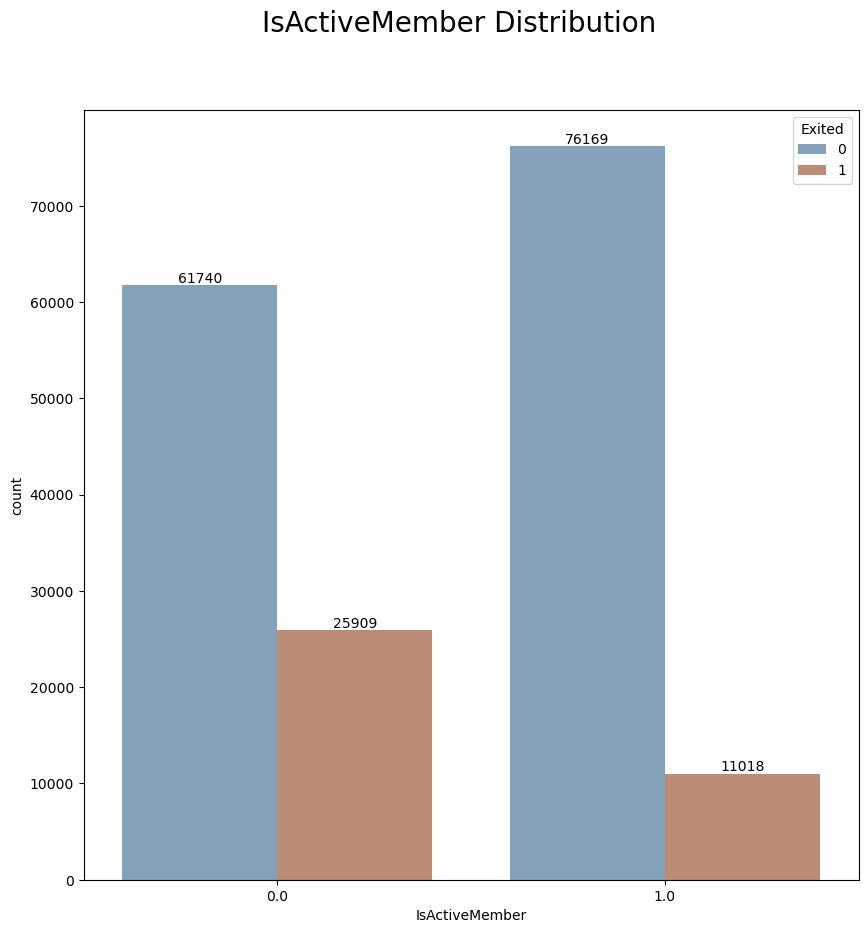

In [56]:
for column in cat_cols:
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.countplot(hue="Exited", x=column, data=train_df, palette="twilight_shifted",)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.suptitle(f'{column} Distribution',fontsize=20)
    plt.show()


- 거주 국가별 가장 많은 이탈수는 가장 고객이 많은 프랑스이지만 비율로 봤을 때는 독일의 이탈률이 가장 크다.
- 성별 이탈 수에서는 여성의 이탈 비율이 높은 것으로 보인다.
- 가입기간에 따른 이탈비율과 신용카드 유뮤에 따른 이탈비율의 특징은 크게 보이지 않는 것 같다.
- 가입 상품이 1개인 사람들의 반이 이탈하고 2개인 사람들은 이탈률은 현저히 적어지는 것만을 볼 때는 가입 상품이 많을 수록 이탈률이 적어지는 것 같지만 정작 3개 이상을 가입한 사람들부터는 이탈하지 않는 사람들보다 이탈하는 사람들이 많다.
- 활성 멤버 여부는 비활성 고객들의 이탈률이 높다.

### 연속형 변수 이탈별 분석

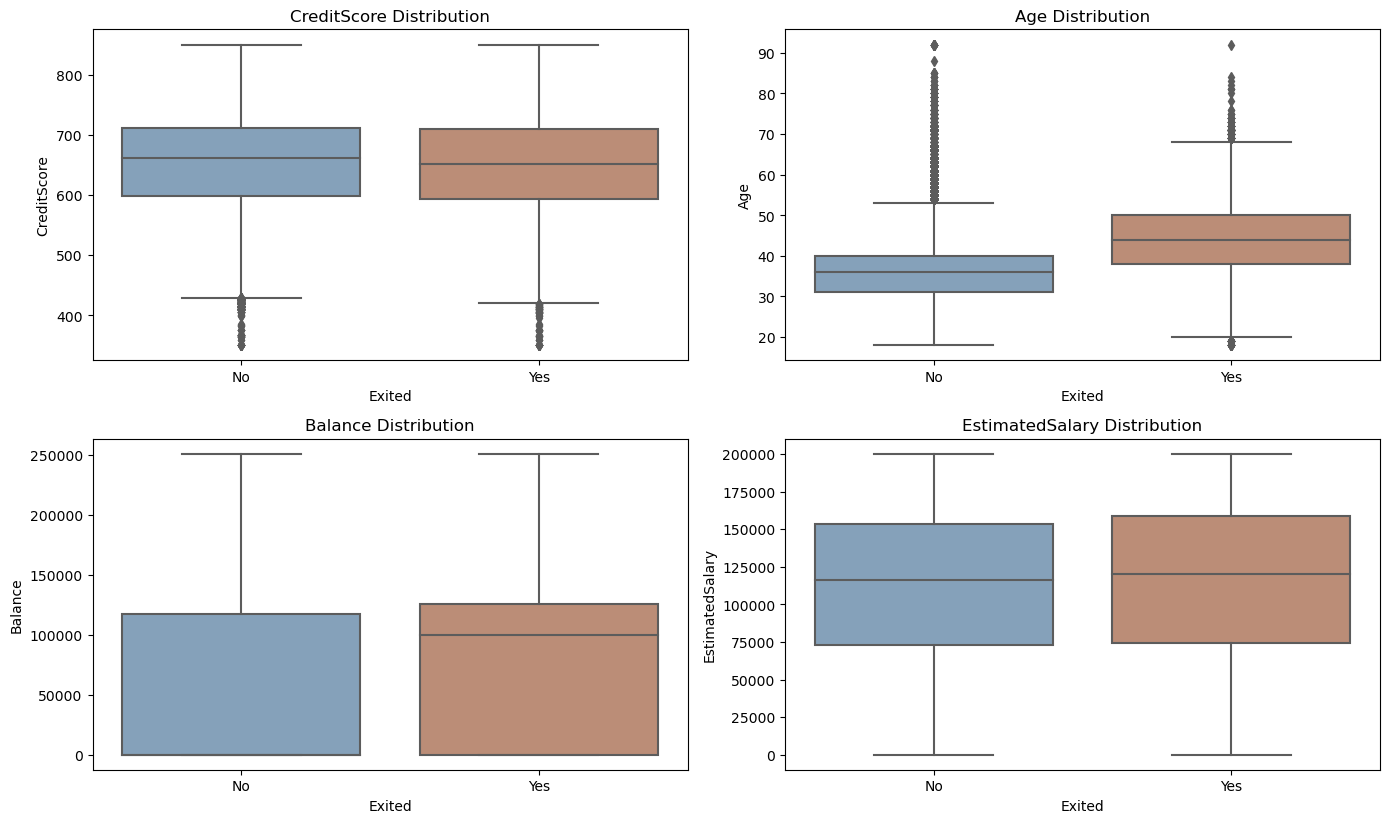

In [25]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.boxplot(x="Exited", y=column, data=train_df, palette="twilight_shifted")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

<Figure size 1400x1000 with 0 Axes>

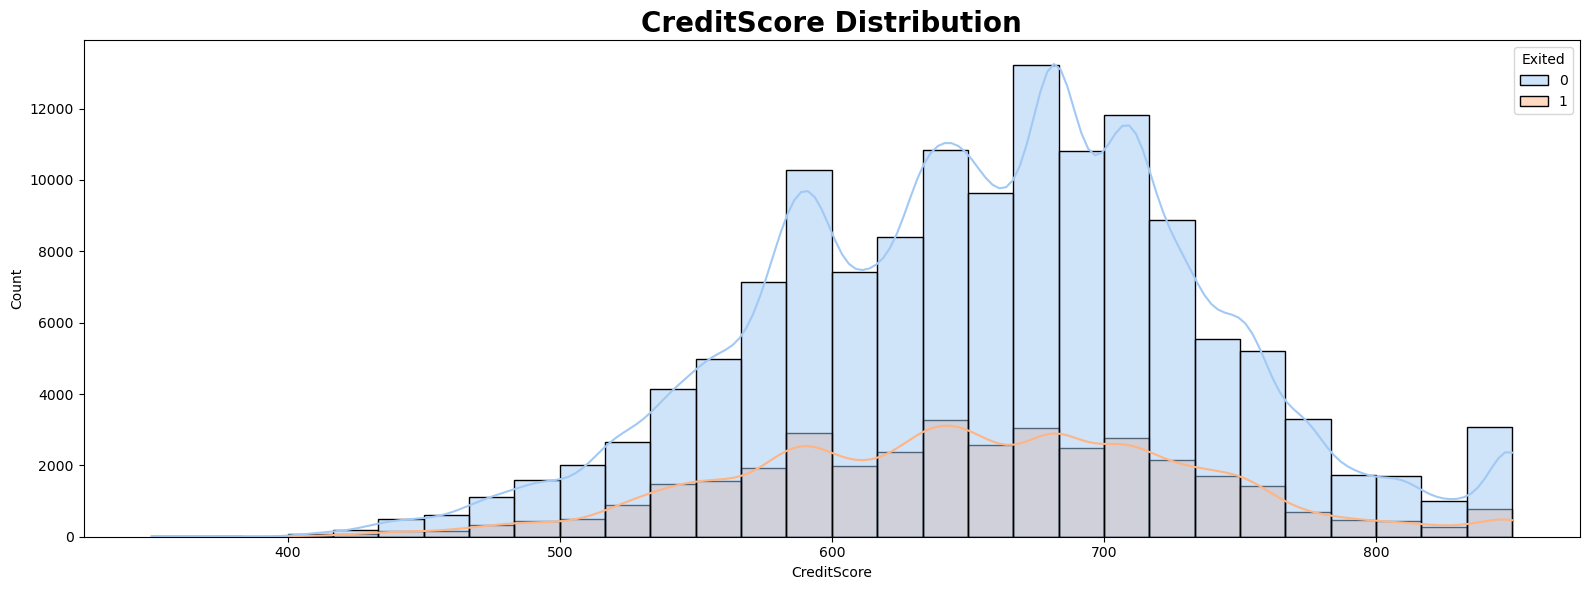

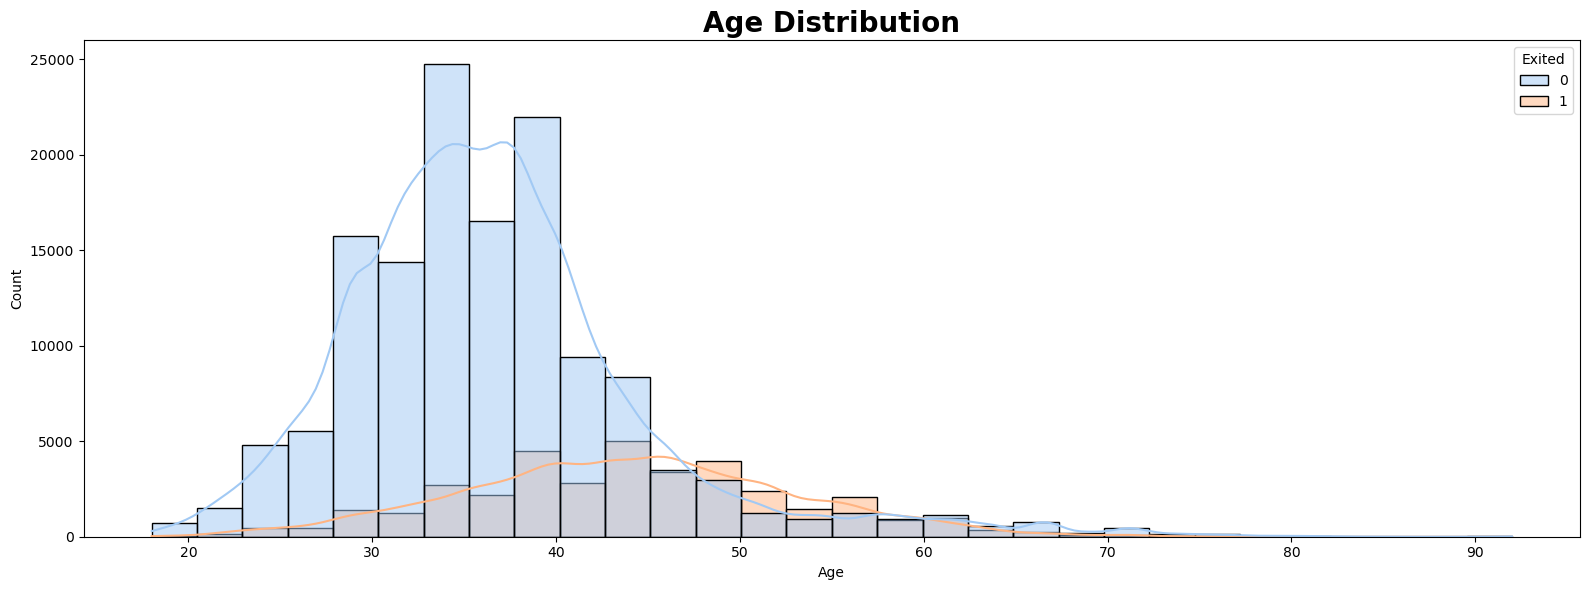

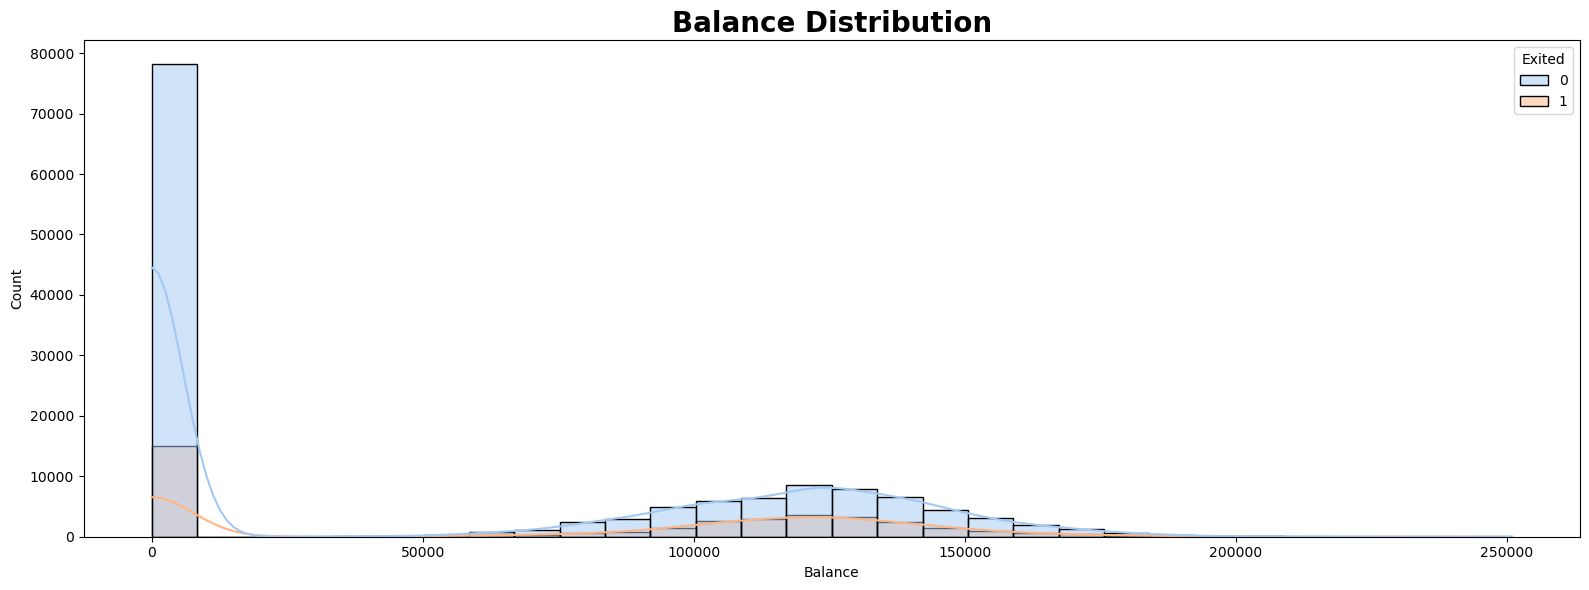

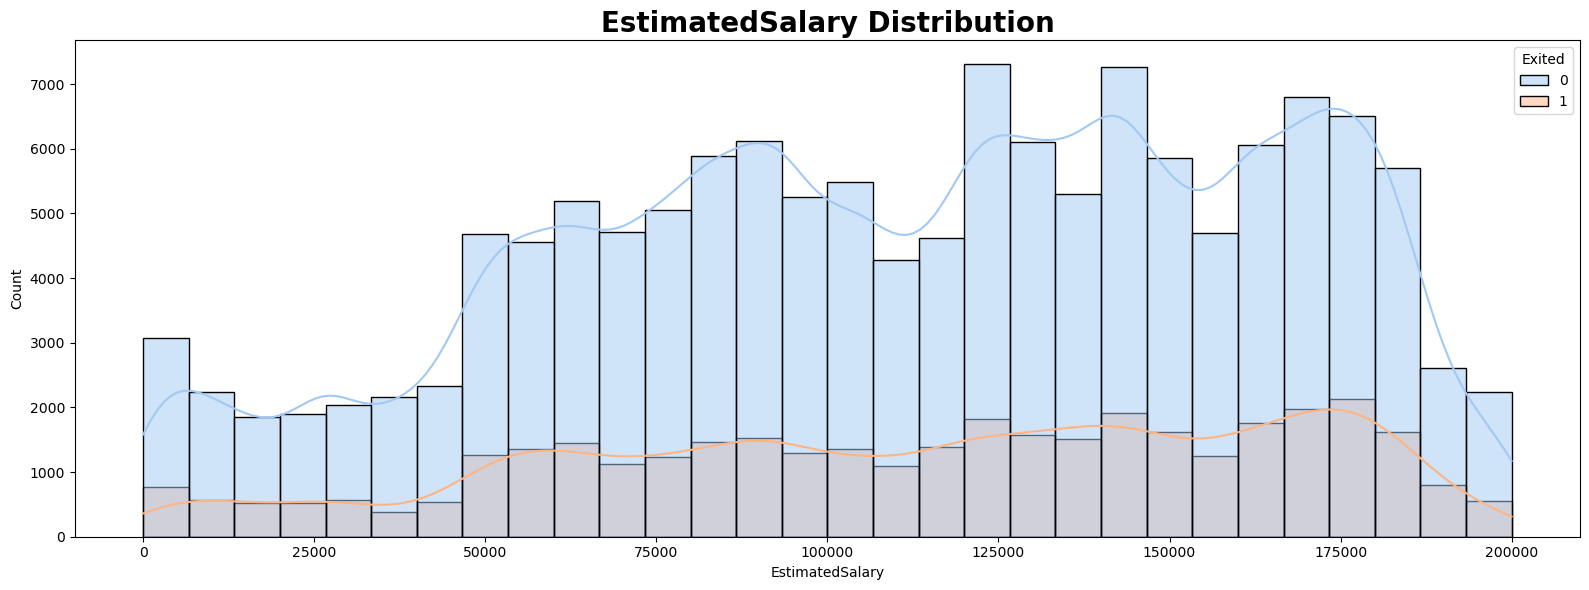

In [39]:
plt.figure(figsize=(14,10))
for idx,column in enumerate(num_cols):
    fig, ax = plt.subplots(figsize=(16, 6))
    fig = sns.histplot(x=column, hue="Exited", data=train_df,bins=30,kde=True, palette="pastel")
    plt.title(f"{column} Distribution",weight='bold',fontsize=20)
    plt.tight_layout()

- 600 - 700 사이의 신용점수를 가진 고객들이 가장 많이 분포하고 있고 신용점수에 따른 이탈률의 특징은 잘 보이지 않는다.
- 나이는 30-40 대의 나이대의 사람들이 가장 많이 분포하고 있고, 40대 후반에서부터 이탈률이 커지는 것을 알 수 있다.
- 잔고는 많은 고객들이 매우 적은 돈을 가지고 있고, 100000 - 150000 대의 잔고를 가지고 있는 사람들의 이탈률이 큰 것으로 보인다
- 예상 급여는 75000 - 150000 사람들이 가장 많이 분포하고 있고, 예상 급여 또한 이탈률의 특징은 잘 보이지 않는다.

In [29]:
train_df["Exited"]=train_df["Exited"].map({"No": 0,"Yes": 1})
train_df["Gender"]=train_df["Gender"].map({"Male": 0,"Female": 1})

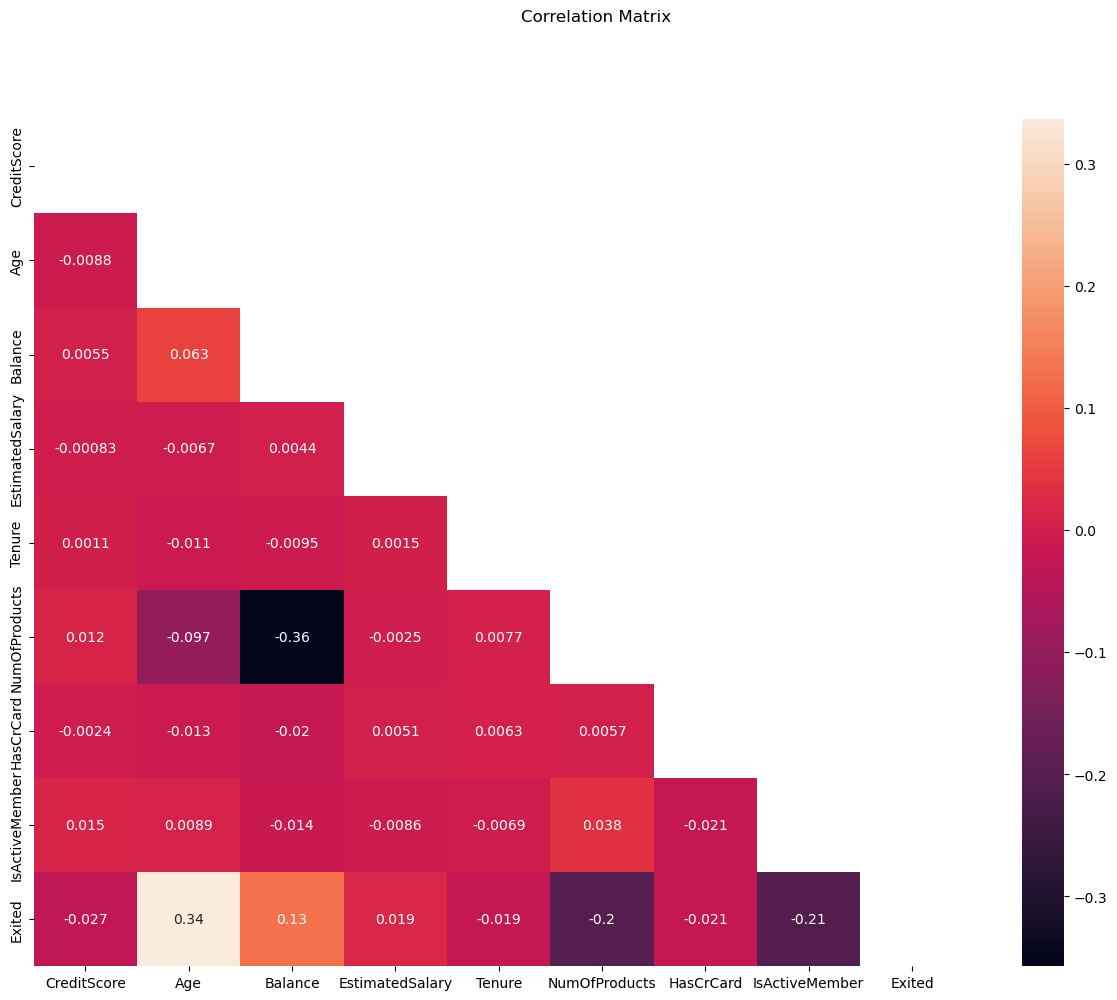

In [30]:
df4 = train_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 
       'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']].copy()

corr_matrix=df4.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()

- 나이, 가입상품수, 활성멤버여부가 이탈률과 상관관계가 있어보인다